# Flo Graph

## 필요 라이브러리 로드

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [77]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [78]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [79]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [80]:
site_name = 'flo'

In [81]:
# 기간 설정
start_date = '2022-04-18'
end_date = '2022-04-24'

In [82]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [83]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/live_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [84]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_vibe_20220405.xlsx
1 live_vibe_20220406.xlsx
2 live_vibe_20220407.xlsx
3 live_vibe_20220412.xlsx
4 live_vibe_20220413.xlsx
5 live_vibe_20220413_154819.xlsx
6 live_vibe_20220414_134945.xlsx
7 live_vibe_20220415_180611.xlsx
8 live_vibe_20220418_111004.xlsx
9 live_vibe_20220419_110642.xlsx
10 live_vibe_20220420_110627.xlsx
11 live_vibe_20220421_110704.xlsx
12 live_vibe_20220422_110647.xlsx
13 live_vibe_20220425_110704.xlsx
14 live_vibe_20220426_110637.xlsx
15 live_vibe_20220427_110635.xlsx
16 live_vibe_20220428_110605.xlsx
17 live_vibe_20220429_110625.xlsx
18 live_vibe_20220430_110605.xlsx
19 live_vibe_20220501_110605.xlsx
20 live_vibe_20220502_110605.xlsx
21 live_vibe_20220503_110605.xlsx
22 live_vibe_20220504_110605.xlsx


## 수집한 파일 모두 합치기

In [85]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-05 00:00:00,1,TOMBOY,(여자) 아이들,I NEVER DIE
1,2022-04-05 00:00:00,2,Feel My Rhythm,Red Velvet (레드벨벳),'The ReVe Festival 2022 - Feel My Rhythm'
2,2022-04-05 00:00:00,3,GANADARA (Feat. 아이유),박재범,GANADARA
3,2022-04-05 00:00:00,4,INVU,태연 (TAEYEON),INVU - The 3rd Album
4,2022-04-05 00:00:00,5,RUN2U,STAYC(스테이씨),YOUNG-LUV.COM


In [86]:
df['날짜'] = df['날짜'].astype(str)

In [87]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,날짜,순위,곡,가수,앨범
0,2022-04-18,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2022-04-18,2,TOMBOY,(여자) 아이들,I NEVER DIE
2,2022-04-18,3,LOVE DIVE,IVE(아이브),LOVE DIVE
3,2022-04-18,4,Feel My Rhythm,Red Velvet (레드벨벳),'The ReVe Festival 2022 - Feel My Rhythm'
4,2022-04-18,5,GANADARA (Feat. 아이유),박재범,GANADARA


In [88]:
sliced_df.tail()

,날짜,순위,곡,가수,앨범
495,2022-04-22,96,Timeless,SG워너비,SG Wanna Be+ (에스지 워너비 플러스)
496,2022-04-22,97,DM,프로미스나인,Midnight Guest
497,2022-04-22,98,거리에서,성시경,The Ballads
498,2022-04-22,99,사건의 지평선,윤하,YOUNHA 6th Album Repackage 'END THEORY : Final...
499,2022-04-22,100,ASAP,STAYC(스테이씨),STAYDOM


In [89]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      500 non-null    object
 1   순위      500 non-null    int64 
 2   곡       500 non-null    object
 3   가수      500 non-null    object
 4   앨범      500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


### 수집한 곡의 유니크

In [90]:
len(sliced_df['곡'].unique())

108

In [91]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-04-18
1,2022-04-19
2,2022-04-20
3,2022-04-21
4,2022-04-22
5,2022-04-23
6,2022-04-24


### 제목과 가수 매칭 값 추출

In [92]:
sort_df = sliced_df[['곡', '가수']]
sort_df

,곡,가수
0,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
1,TOMBOY,(여자) 아이들
2,LOVE DIVE,IVE(아이브)
3,Feel My Rhythm,Red Velvet (레드벨벳)
4,GANADARA (Feat. 아이유),박재범
...,...,...
495,Timeless,SG워너비
496,DM,프로미스나인
497,거리에서,성시경
498,사건의 지평선,윤하


In [93]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

,곡,가수
0,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
1,TOMBOY,(여자) 아이들
2,LOVE DIVE,IVE(아이브)
3,Feel My Rhythm,Red Velvet (레드벨벳)
4,GANADARA (Feat. 아이유),박재범
...,...,...
103,As It Was,Harry Styles
104,마지막 너의 인사,헤이즈 (Heize)
105,Seoul,볼빨간사춘기
106,Love Theory,태용 (TAEYONG)


### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [94]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [95]:
len(song_df_list)

108

## 그래프 테스트

### 노래 선택

In [96]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      7 non-null      object 
 1   순위      5 non-null      float64
 2   곡       7 non-null      object 
 3   가수      7 non-null      object 
 4   앨범      7 non-null      object 
 5   순위변동    5 non-null      float64
dtypes: float64(2), object(4)
memory usage: 392.0+ bytes


In [97]:
tmp = song_df_list[100]
tmp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,NaN,우리들의 블루스,임영웅,IM HERO,NaN
1,2022-04-19,77.0,우리들의 블루스,임영웅,IM HERO,0.0
2,2022-04-20,52.0,우리들의 블루스,임영웅,IM HERO,25.0
3,2022-04-21,42.0,우리들의 블루스,임영웅,IM HERO,10.0
4,2022-04-22,53.0,우리들의 블루스,임영웅,IM HERO,-11.0
5,2022-04-23,NaN,우리들의 블루스,임영웅,IM HERO,NaN
6,2022-04-24,NaN,우리들의 블루스,임영웅,IM HERO,NaN


In [98]:
tmp['곡'].value_counts().index.values[0]

'우리들의 블루스'

In [99]:
tmp['가수'].value_counts().index.values[0]

'임영웅'

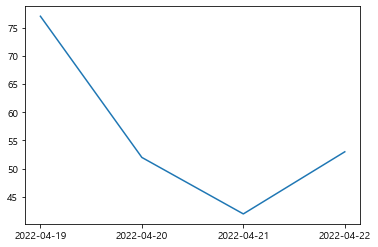

In [100]:
plt.plot(tmp['날짜'], tmp['순위'])

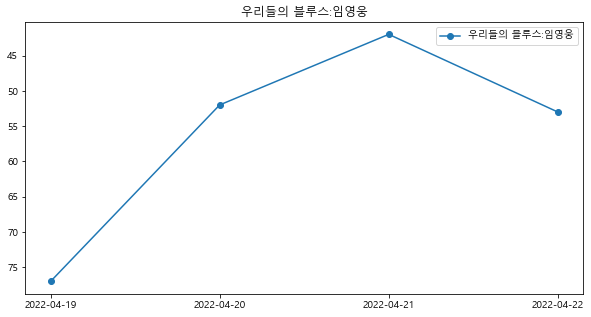

In [101]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [102]:
temp_df = song_df_list[70:91]

### 그래프

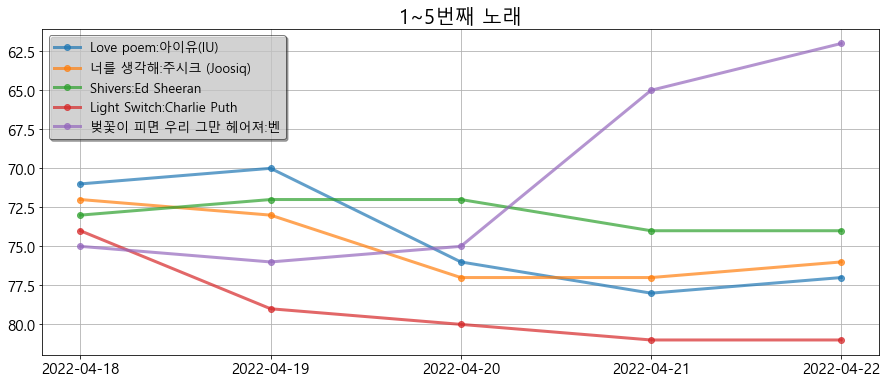

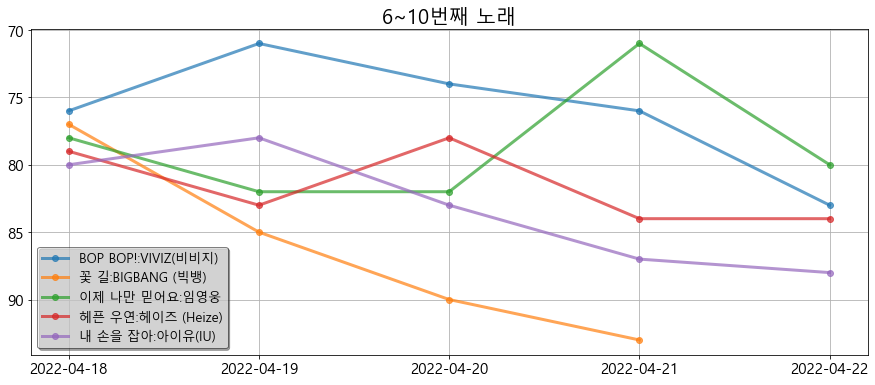

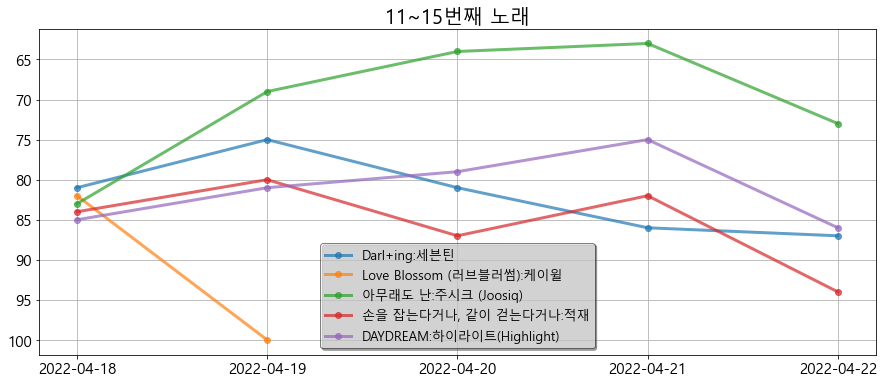

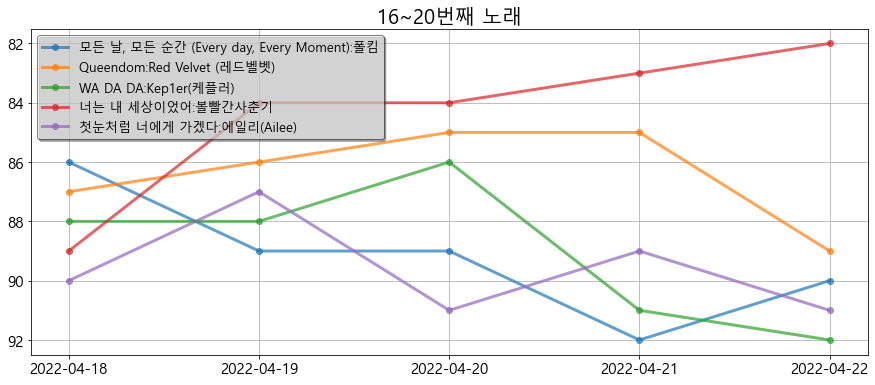

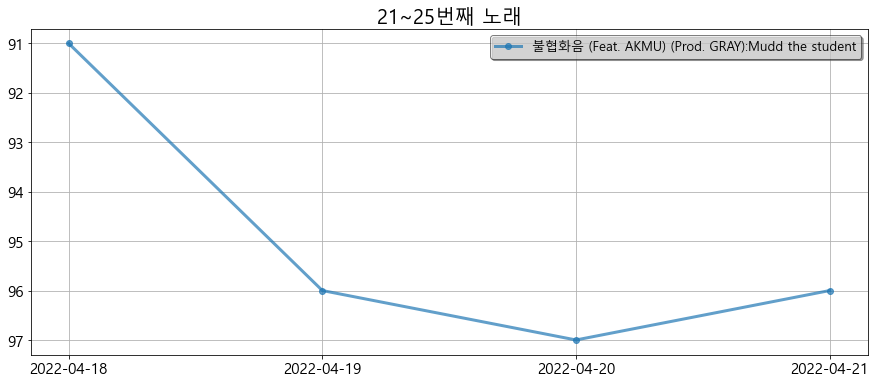

In [103]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [104]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

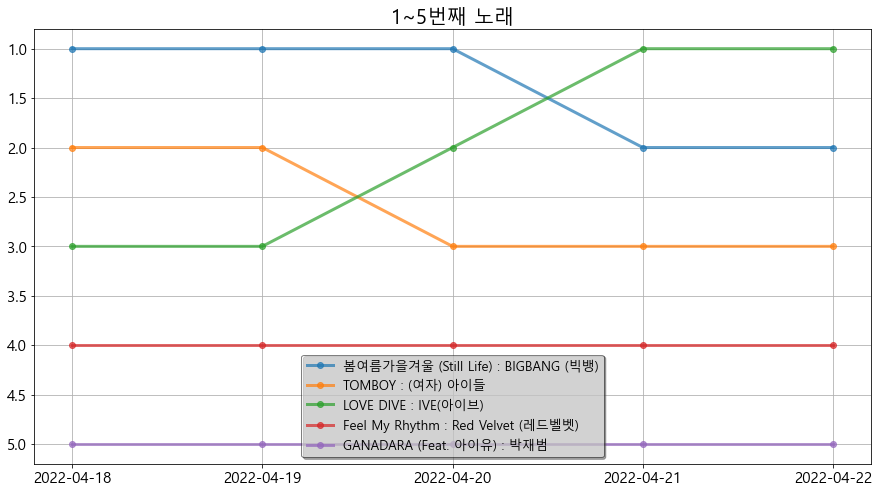

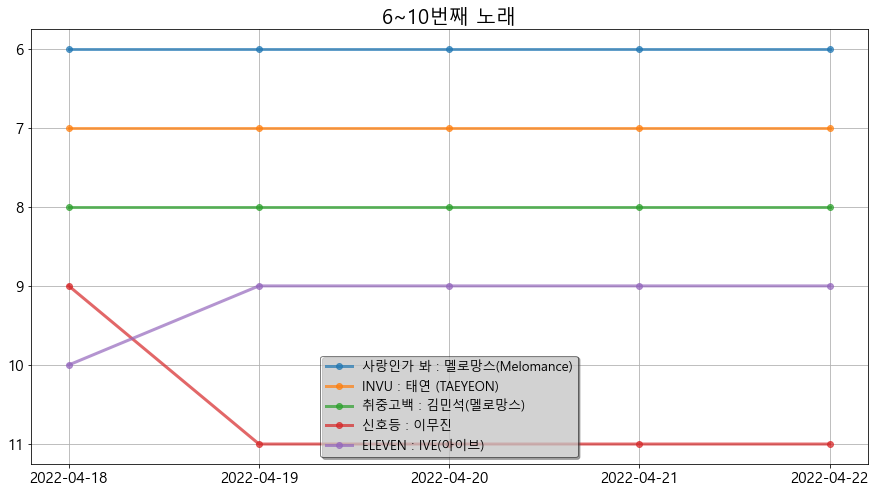

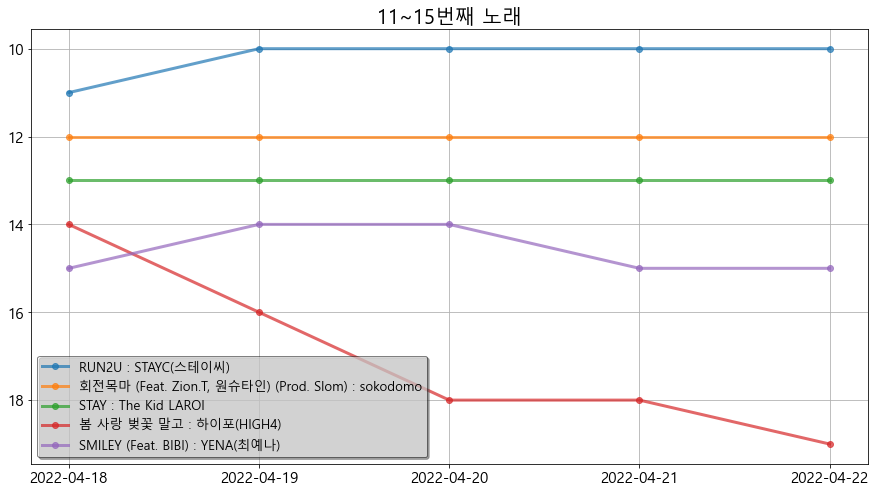

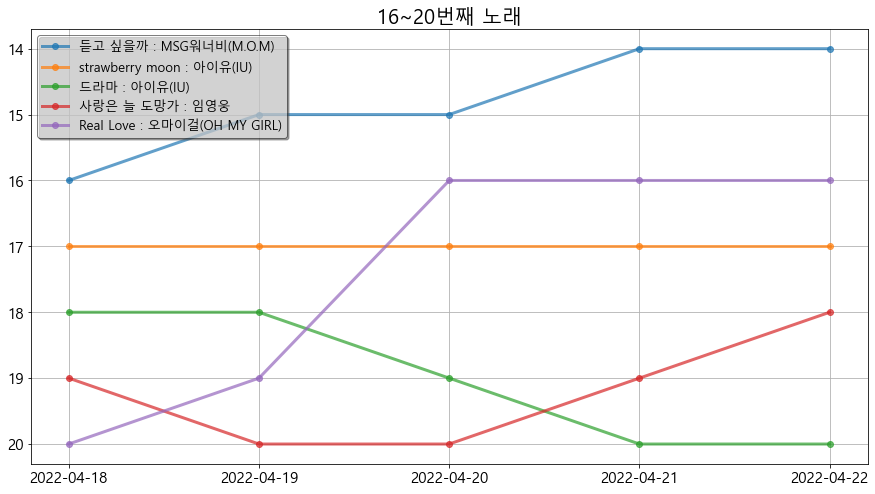

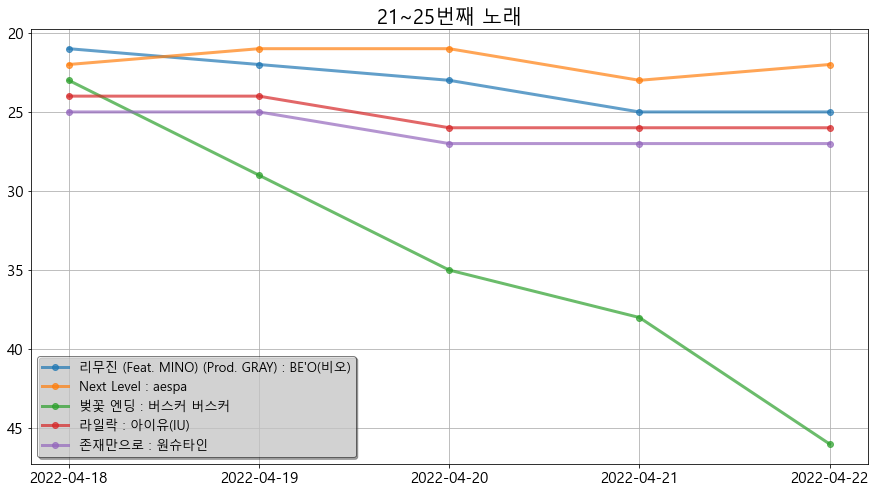

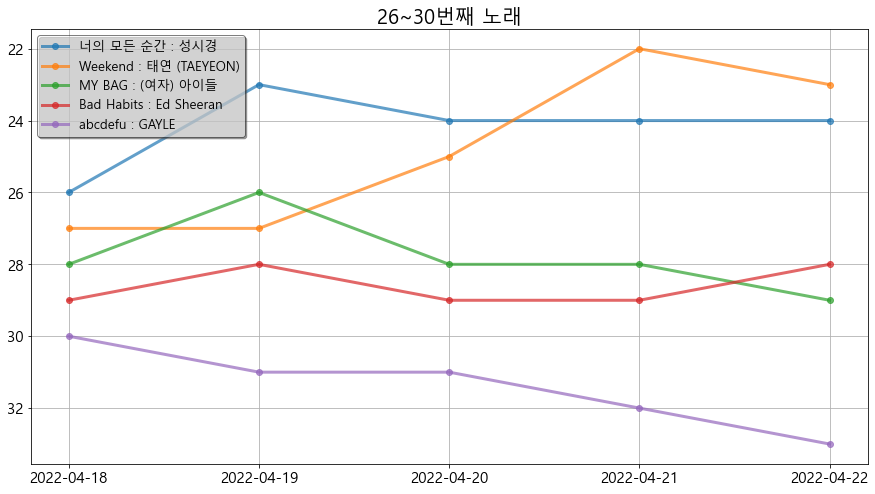

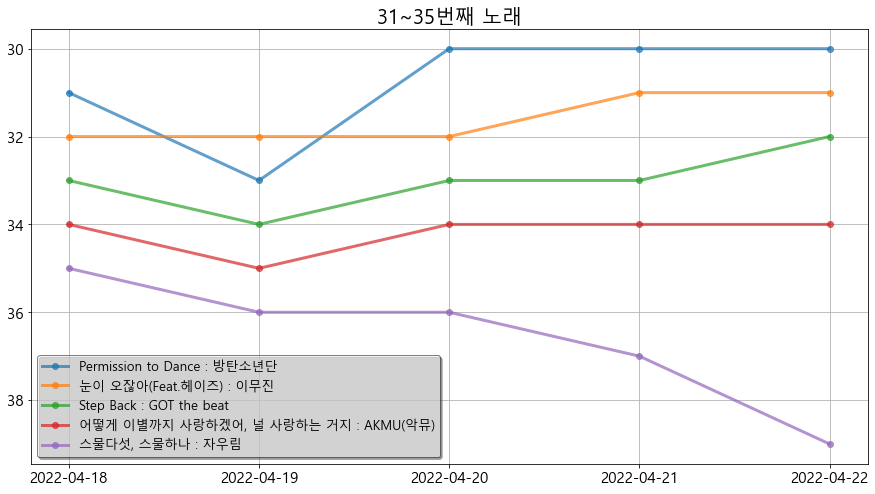

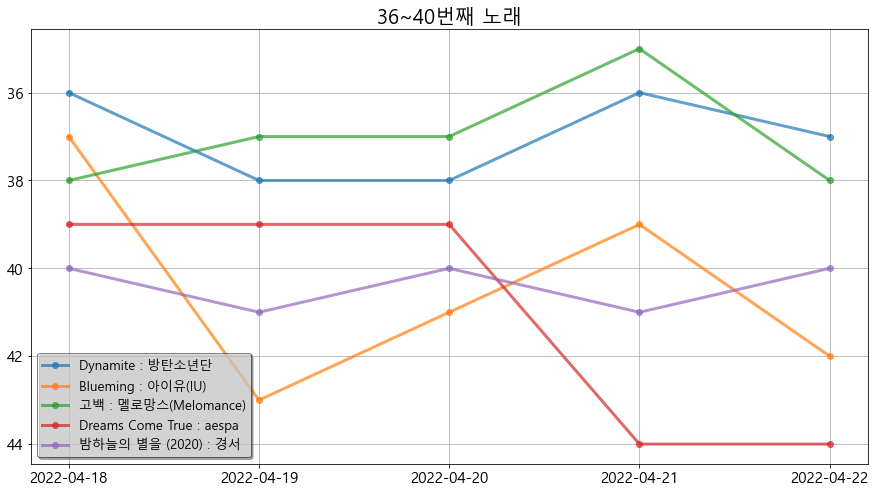

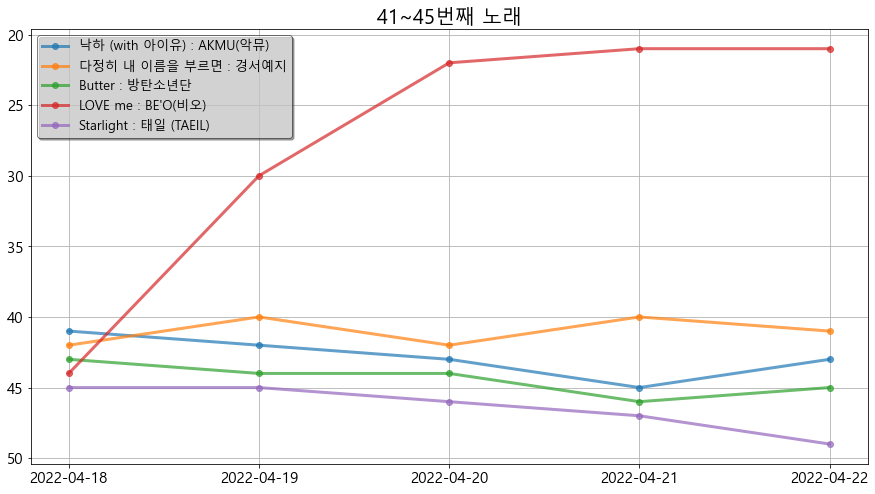

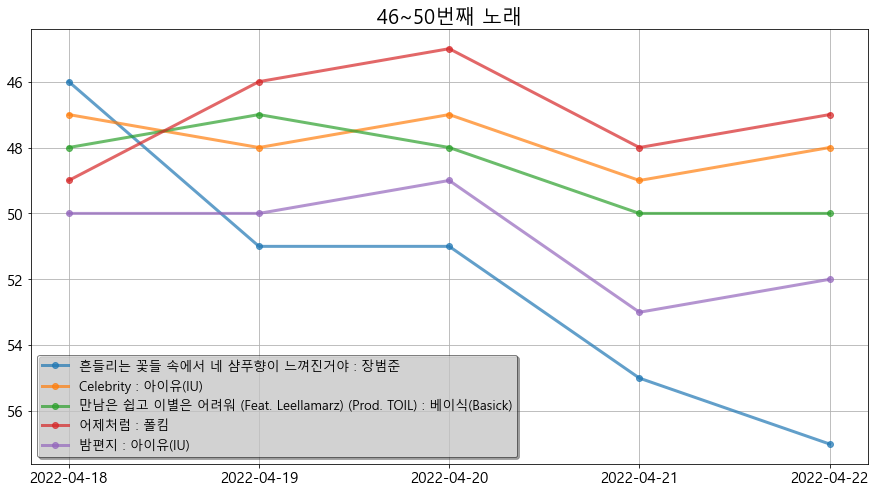

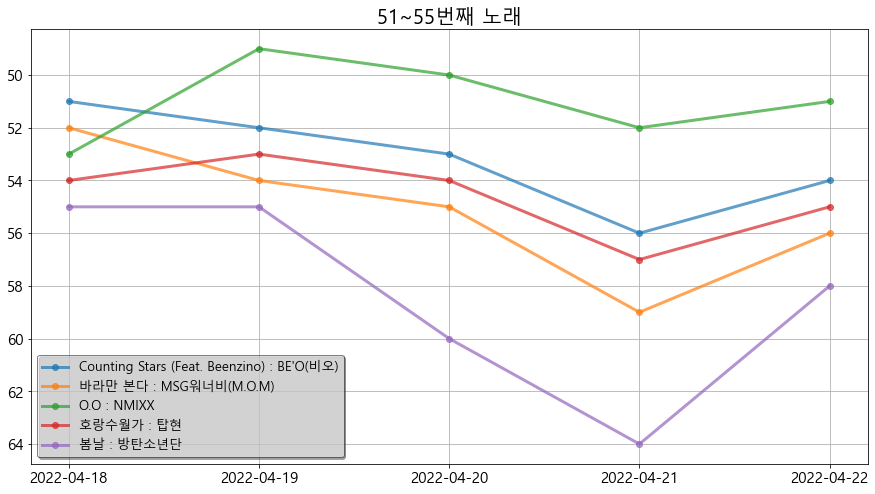

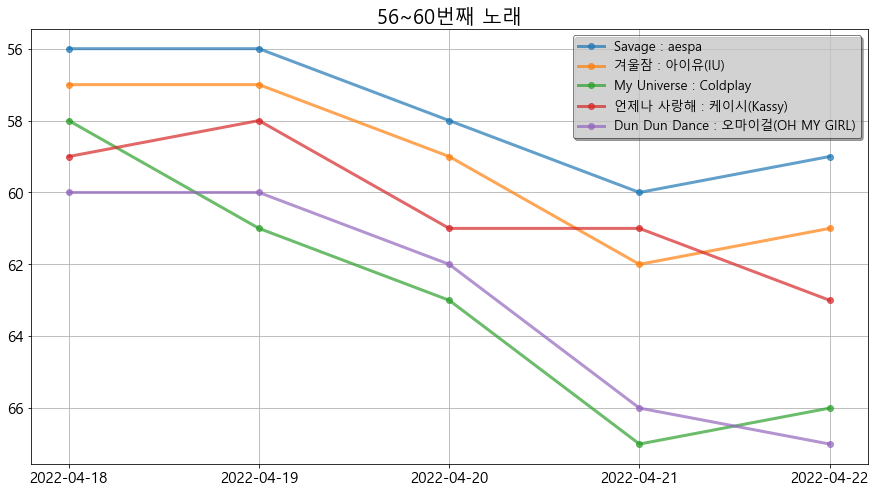

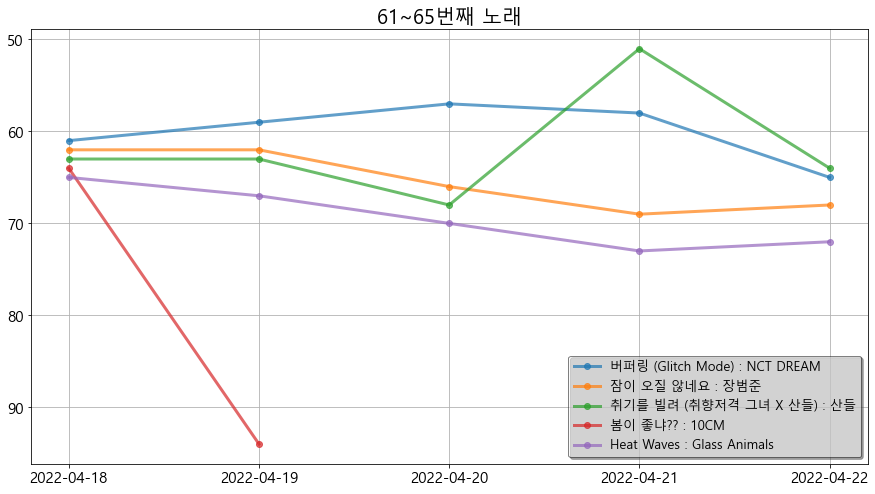

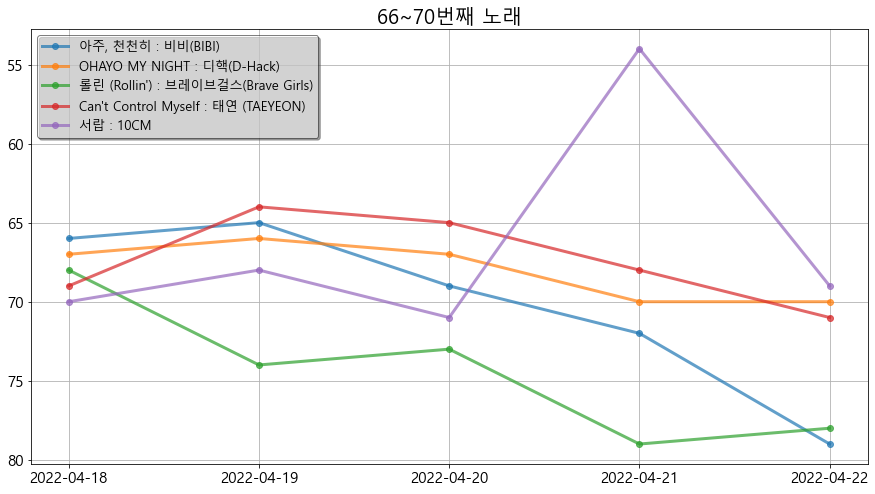

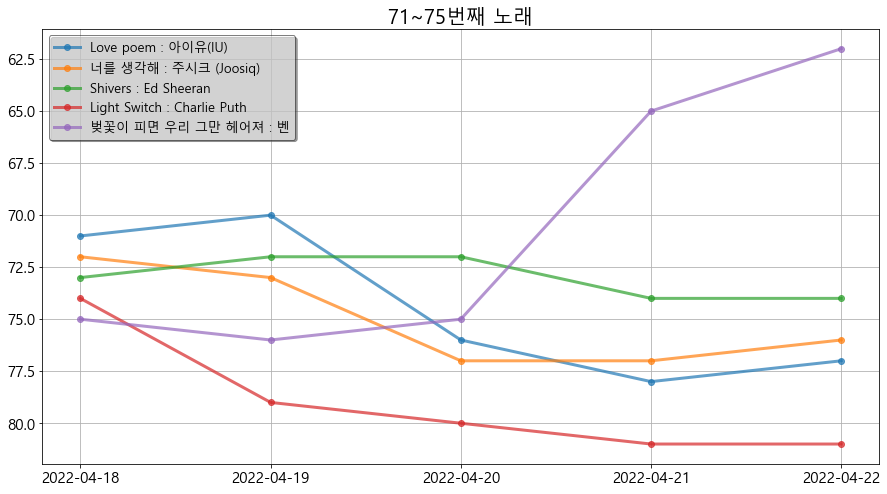

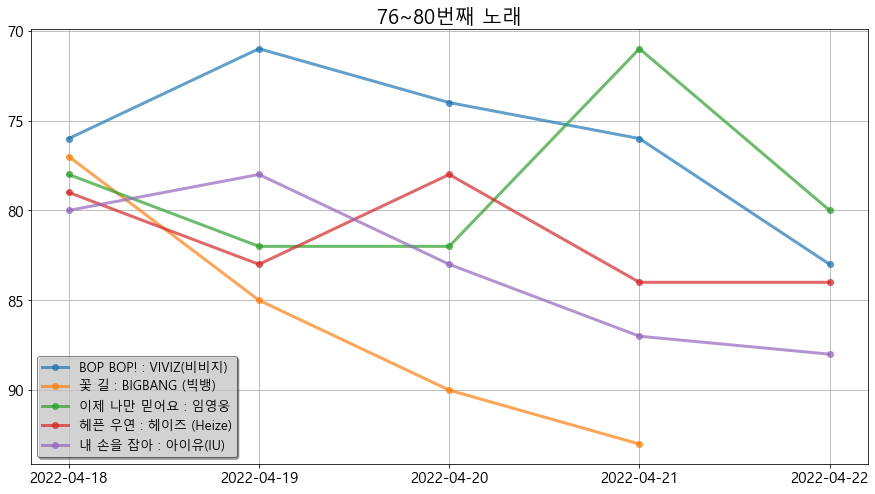

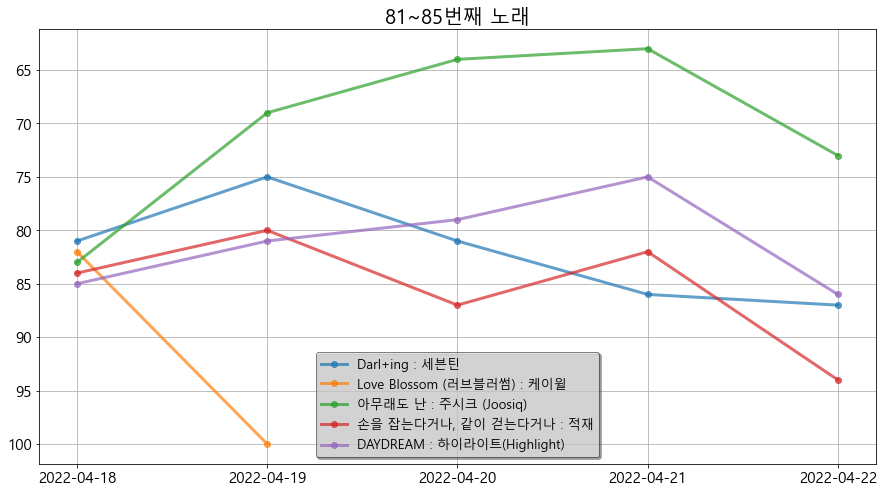

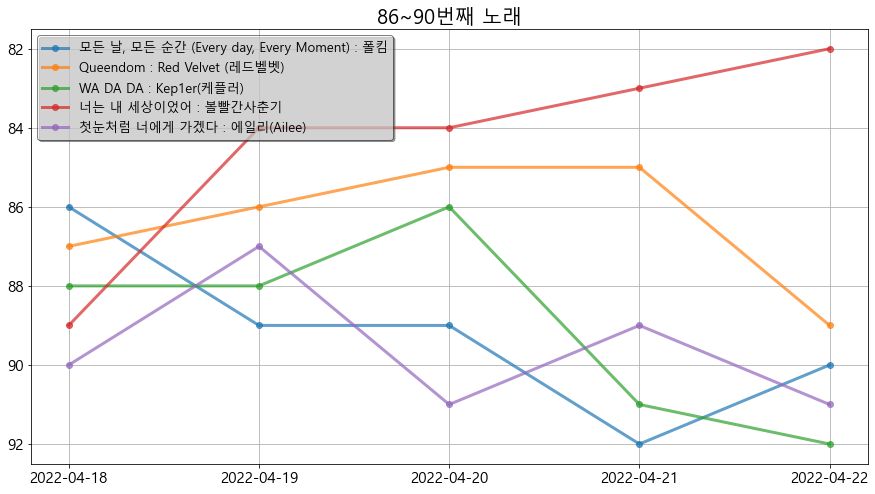

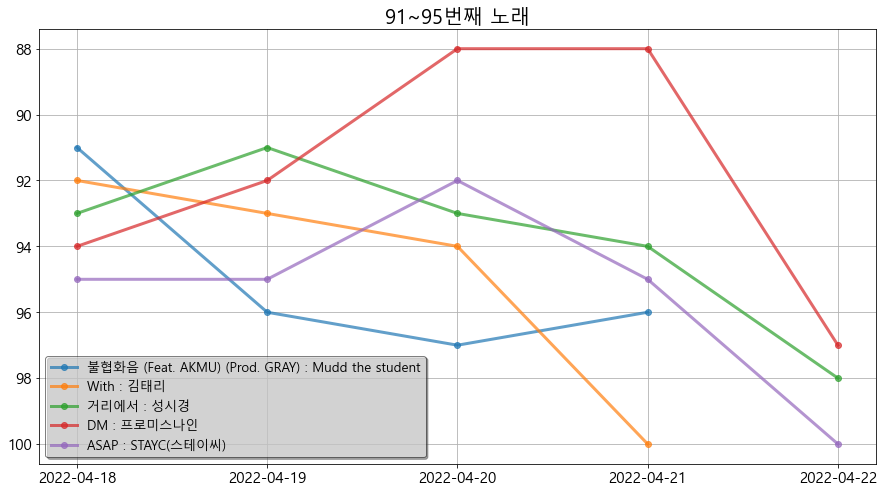

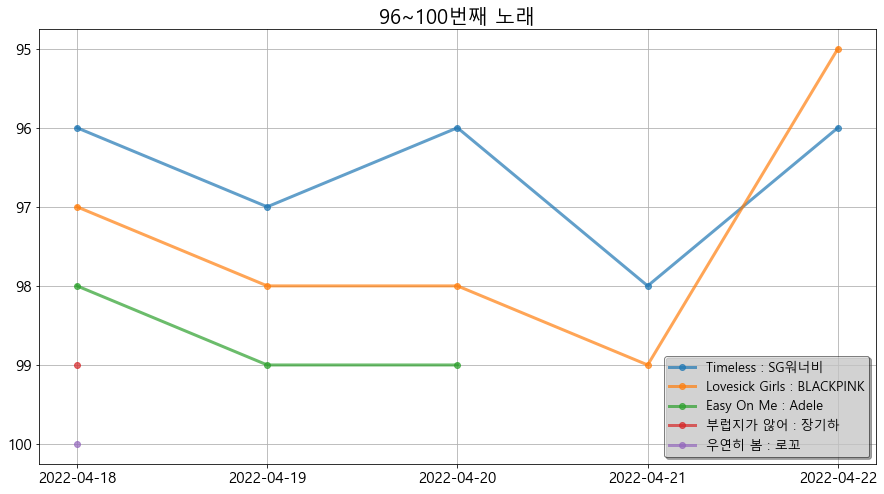

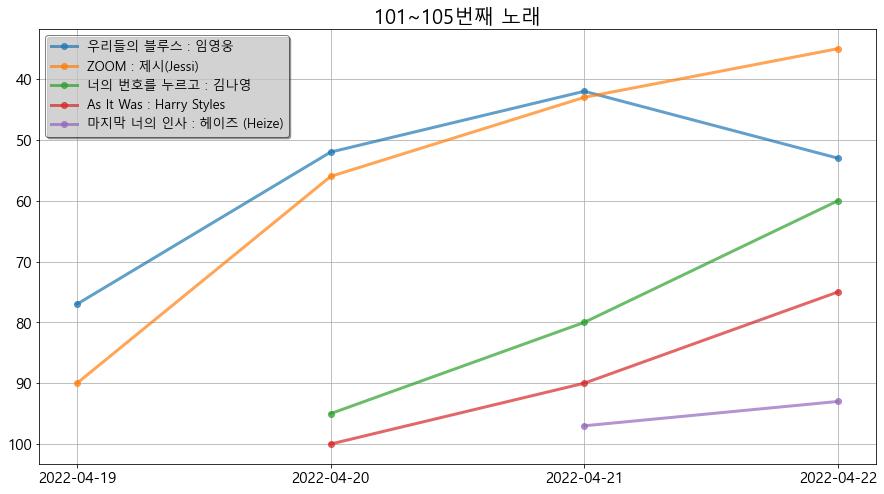

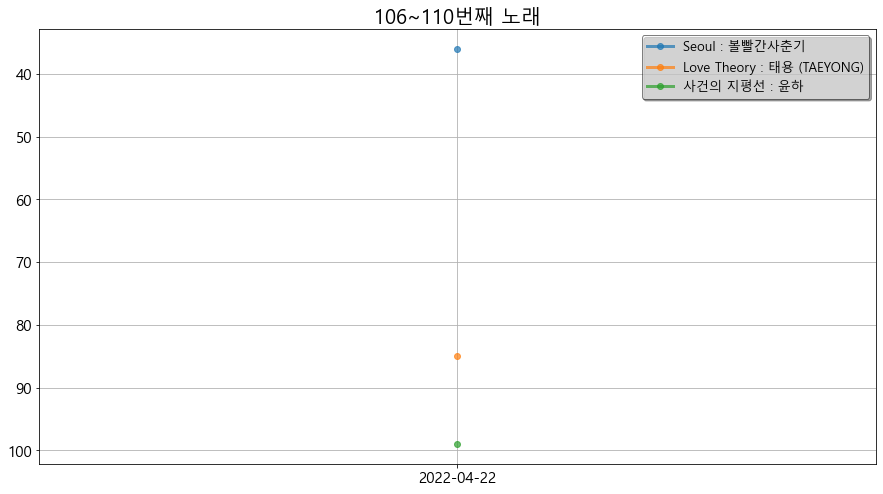

In [105]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [106]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

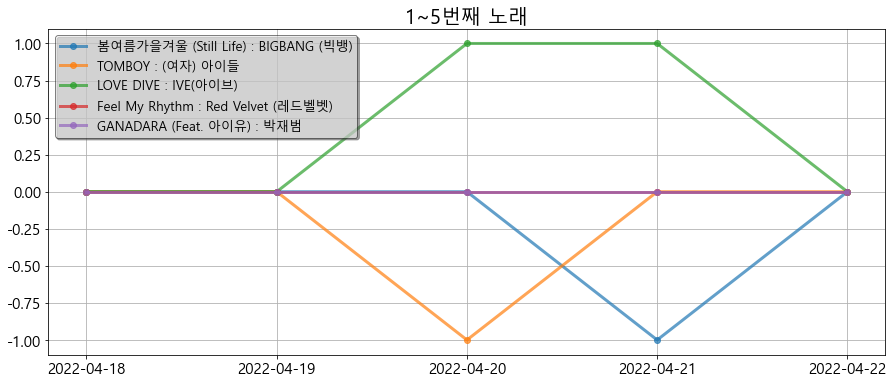

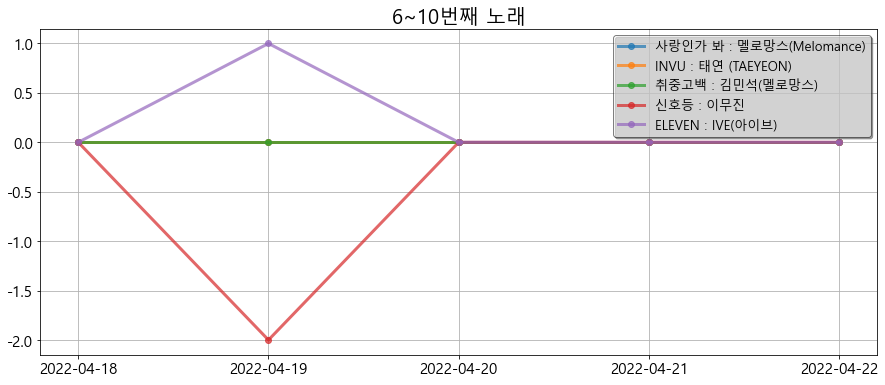

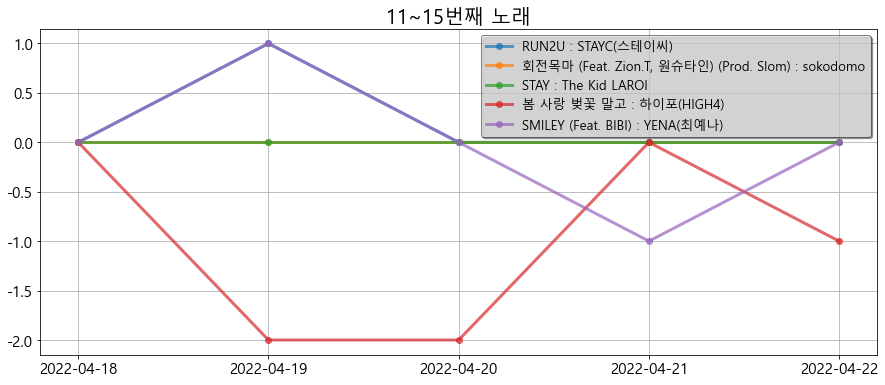

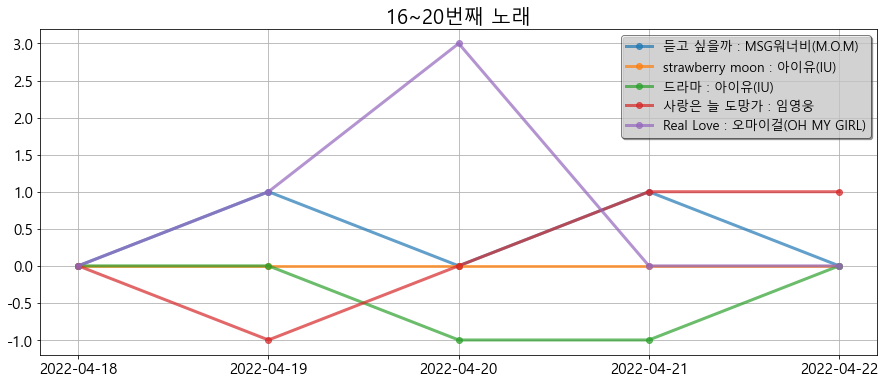

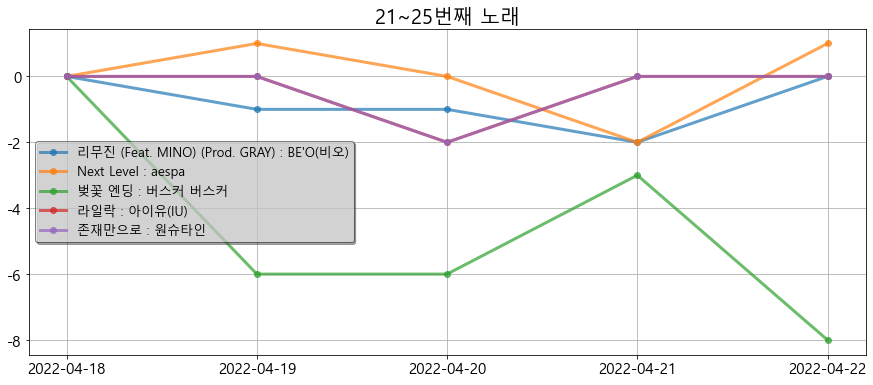

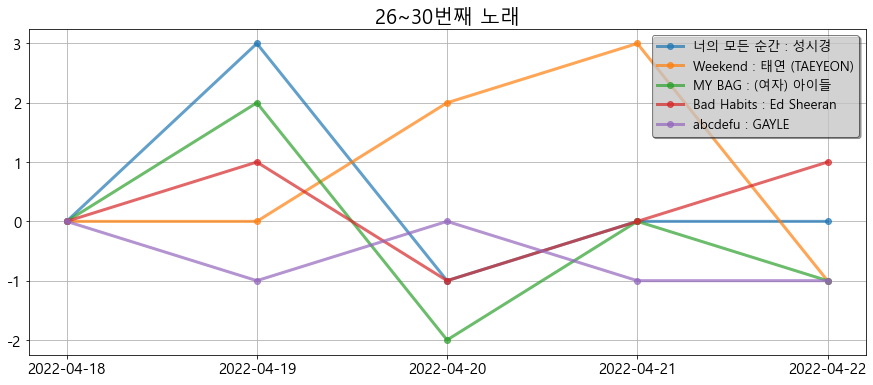

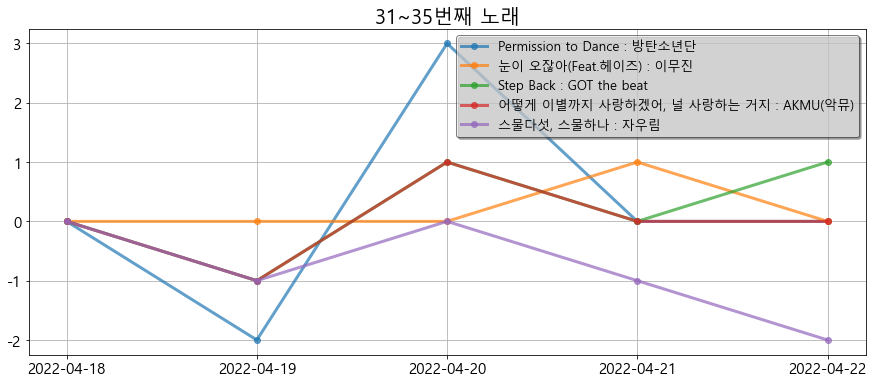

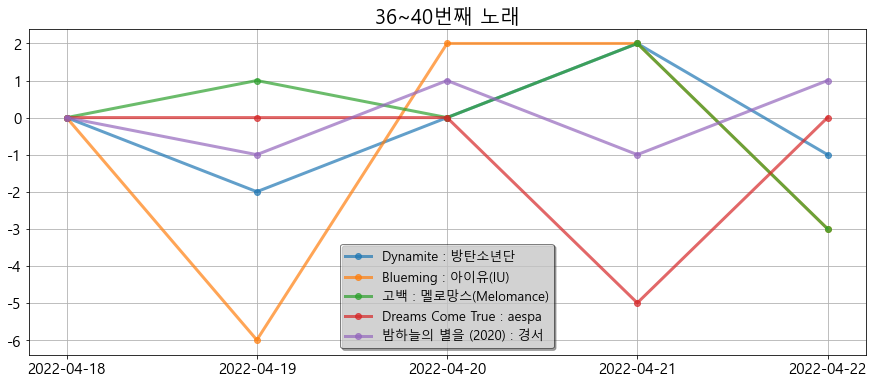

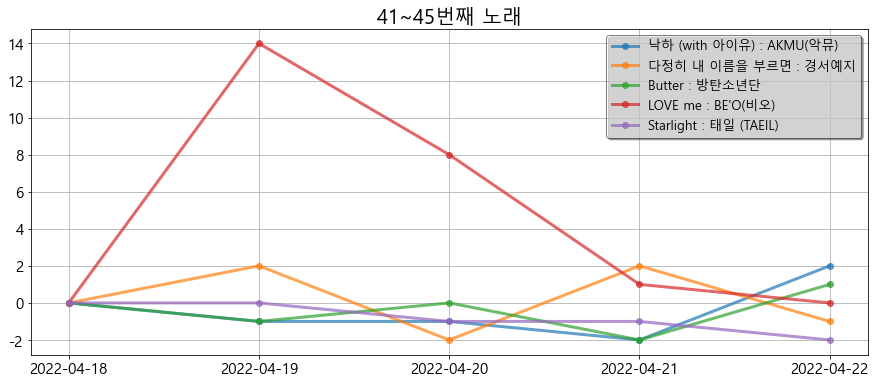

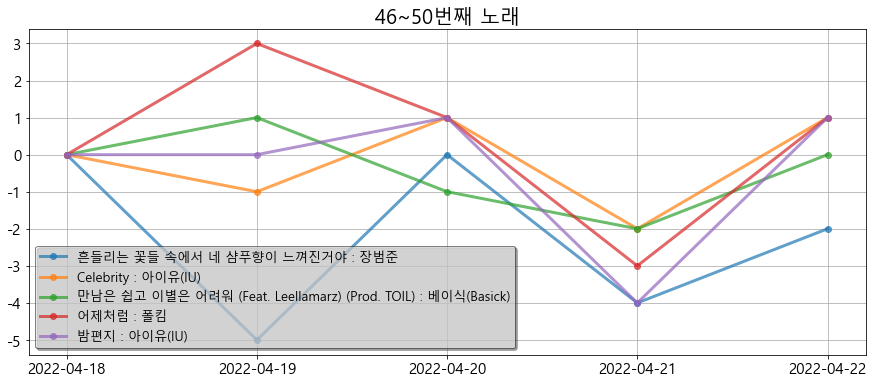

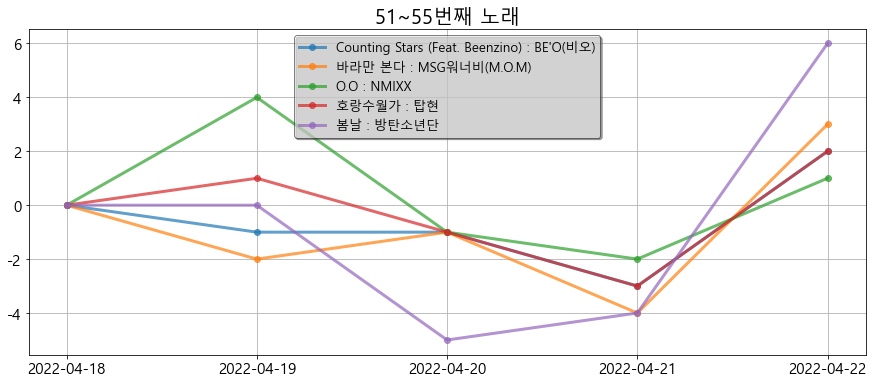

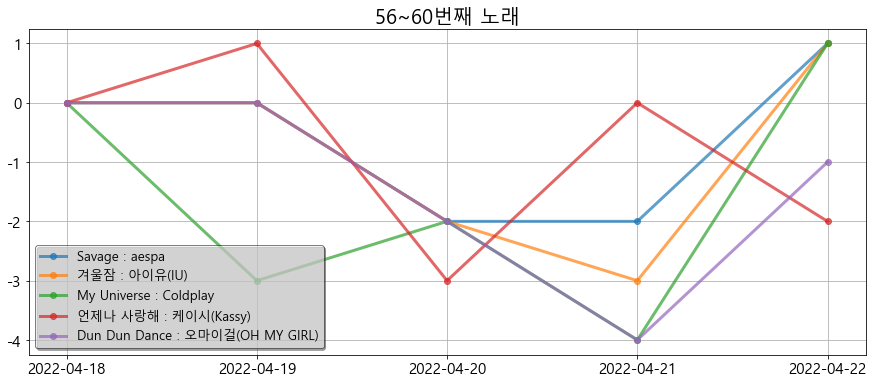

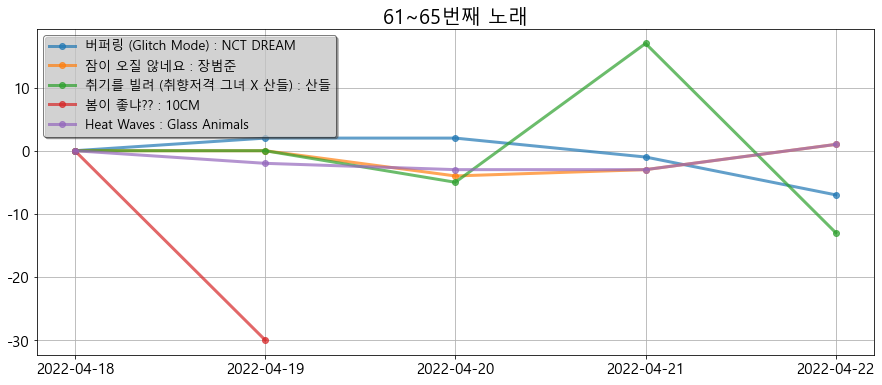

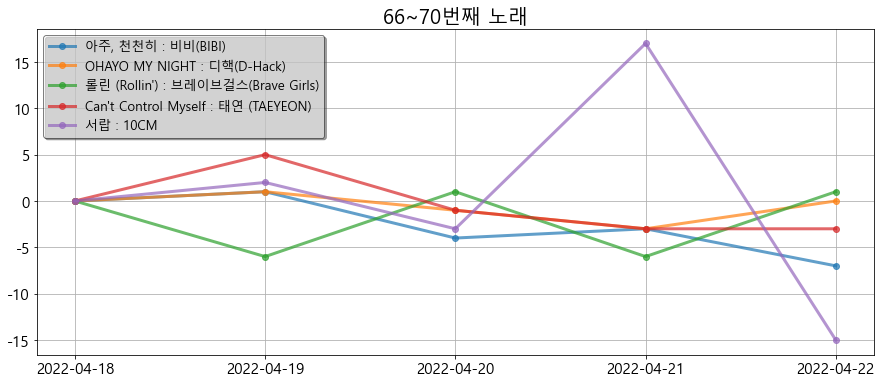

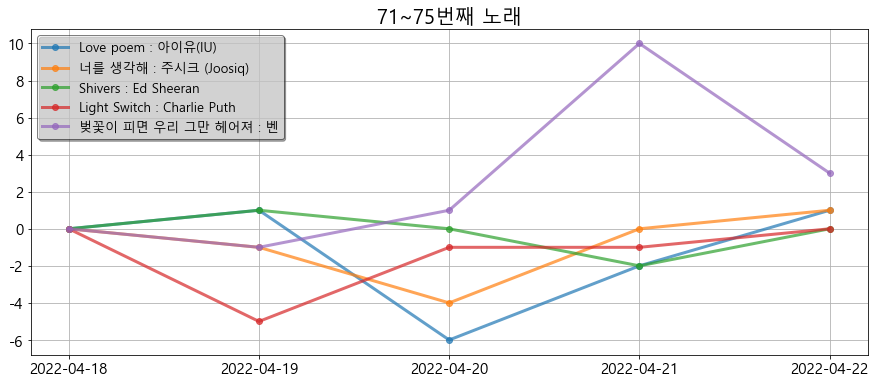

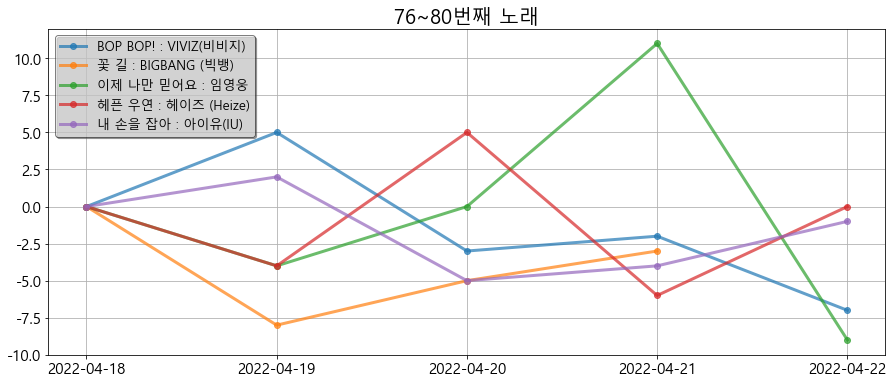

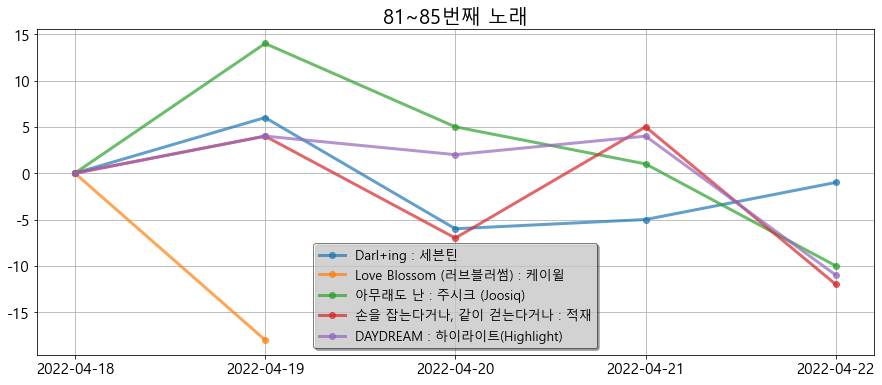

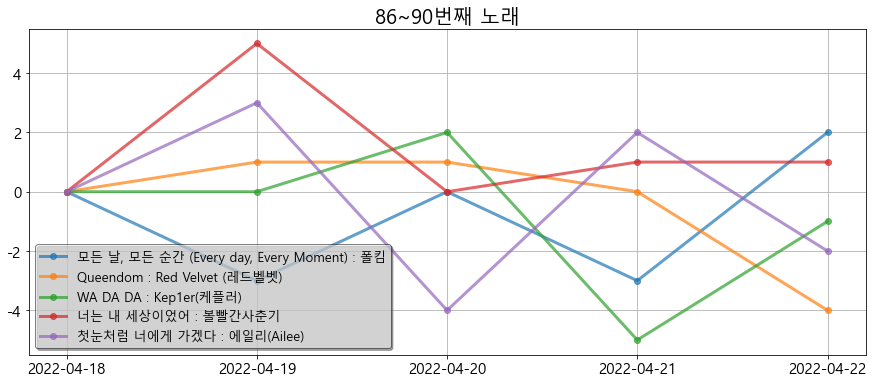

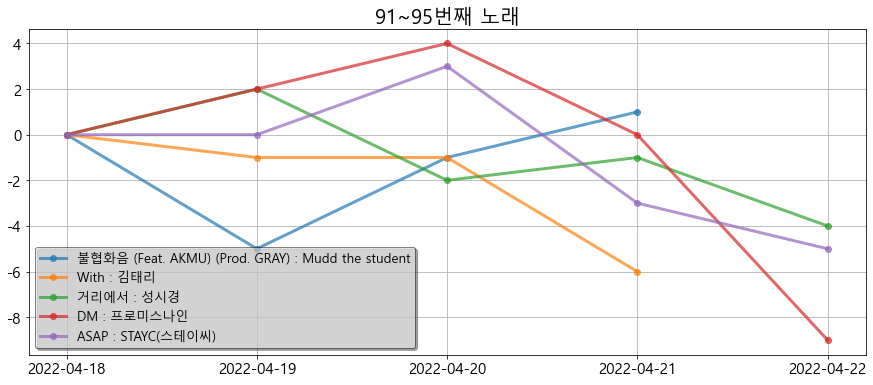

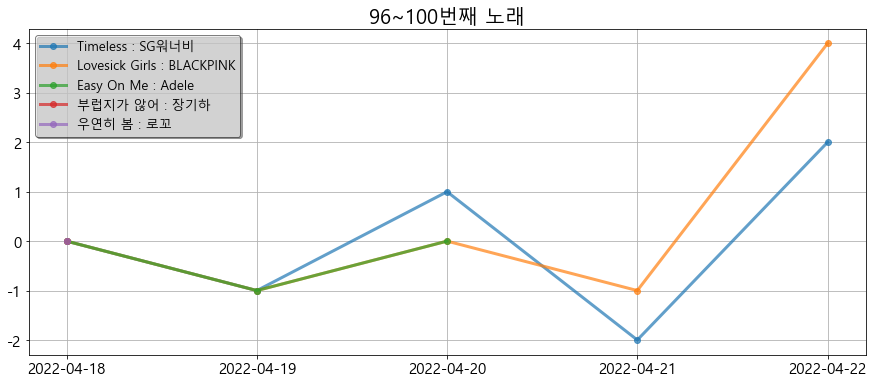

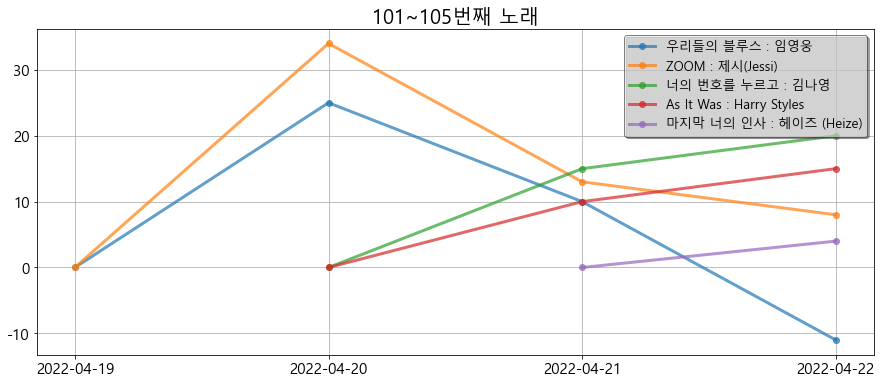

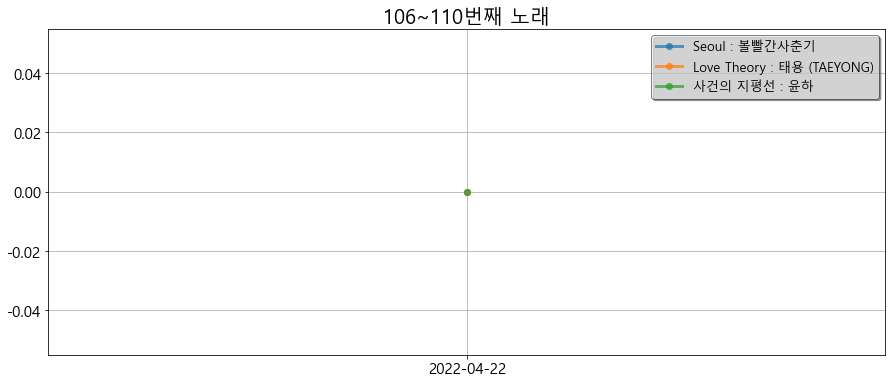

In [107]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [108]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [109]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      756 non-null    object 
 1   순위      500 non-null    float64
 2   곡       756 non-null    object 
 3   가수      756 non-null    object 
 4   앨범      756 non-null    object 
 5   순위변동    500 non-null    float64
dtypes: float64(2), object(4)
memory usage: 35.6+ KB


In [110]:
total_df['순위변동'].describe()

count    500.000000
mean      -0.204000
std        4.168109
min      -30.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max       34.000000
Name: 순위변동, dtype: float64

In [111]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    116.000000
mean       3.758621
std        5.305650
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       34.000000
Name: 순위변동, dtype: float64

In [112]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

1.0 4.0 3.0 8.5


### 이상치 곡 추출

In [113]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-19,30.0,LOVE me,BE'O(비오),LOVE me,14.0
1,2022-04-21,51.0,취기를 빌려 (취향저격 그녀 X 산들),산들,취기를 빌려 (취향저격 그녀 X 산들),17.0
2,2022-04-21,54.0,서랍,10CM,그 해 우리는 OST Part 1,17.0
3,2022-04-21,65.0,벚꽃이 피면 우리 그만 헤어져,벤,벚꽃이 피면 우리 그만 헤어져,10.0
4,2022-04-21,71.0,이제 나만 믿어요,임영웅,내일은 미스터트롯 우승자 특전곡,11.0
5,2022-04-19,69.0,아무래도 난,주시크 (Joosiq),아무래도 난,14.0
6,2022-04-20,52.0,우리들의 블루스,임영웅,IM HERO,25.0
7,2022-04-20,56.0,ZOOM,제시(Jessi),ZOOM,34.0
8,2022-04-21,80.0,너의 번호를 누르고,김나영,너의 번호를 누르고,15.0
9,2022-04-21,90.0,As It Was,Harry Styles,As It Was,10.0


In [114]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 10


### 급등 음원의 샘플 추출

In [115]:
big_change_music_name_list = outlier_df['곡'].tolist()
print('이상치 곡의 개수 :', len(big_change_music_name_list) ) 
print(big_change_music_name_list)

이상치 곡의 개수 : 10
['LOVE me', '취기를 빌려 (취향저격 그녀 X 산들)', '서랍', '벚꽃이 피면 우리 그만 헤어져', '이제 나만 믿어요', '아무래도 난', '우리들의 블루스', 'ZOOM', '너의 번호를 누르고', 'As It Was']


In [116]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2] ].reset_index(drop=True)
temp

,날짜,순위,곡,가수,앨범,순위변동
0,2022-04-18,70.0,서랍,10CM,그 해 우리는 OST Part 1,0.0
1,2022-04-19,68.0,서랍,10CM,그 해 우리는 OST Part 1,2.0
2,2022-04-20,71.0,서랍,10CM,그 해 우리는 OST Part 1,-3.0
3,2022-04-21,54.0,서랍,10CM,그 해 우리는 OST Part 1,17.0
4,2022-04-22,69.0,서랍,10CM,그 해 우리는 OST Part 1,-15.0
5,2022-04-23,NaN,서랍,10CM,그 해 우리는 OST Part 1,NaN
6,2022-04-24,NaN,서랍,10CM,그 해 우리는 OST Part 1,NaN


In [117]:
title = temp['곡'].value_counts().index[0]
title

'서랍'

In [118]:
artist = temp['가수'].value_counts().index[0]
artist

'10CM'

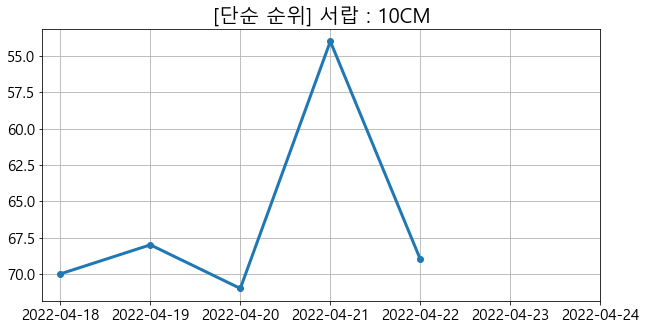

In [119]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

In [120]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')
mod_start_date, mod_end_date

('20220418', '20220424')

In [121]:
path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

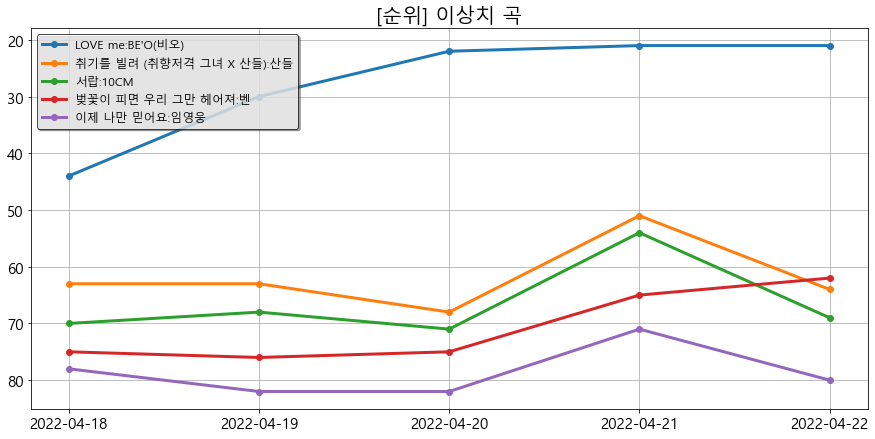

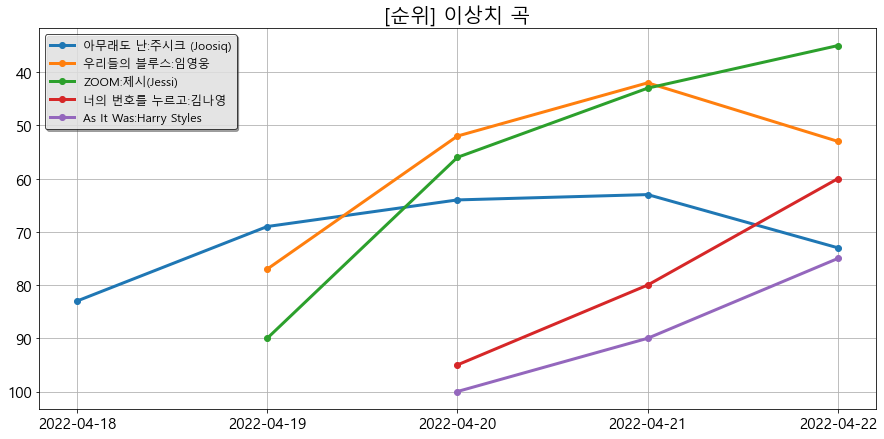

In [124]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

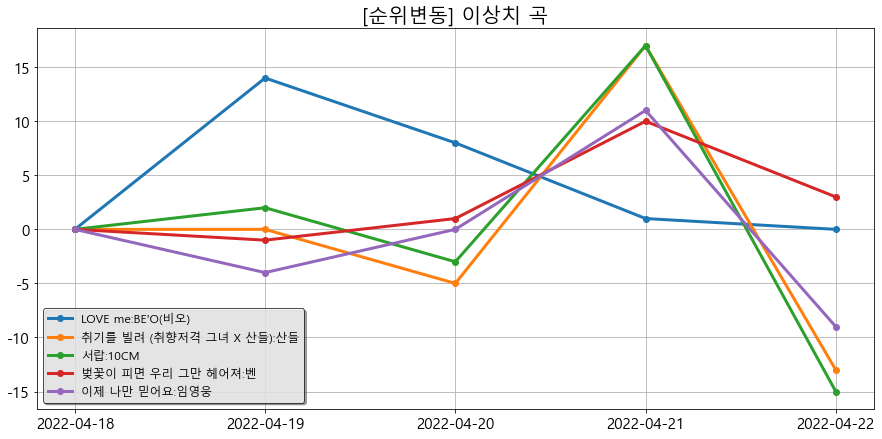

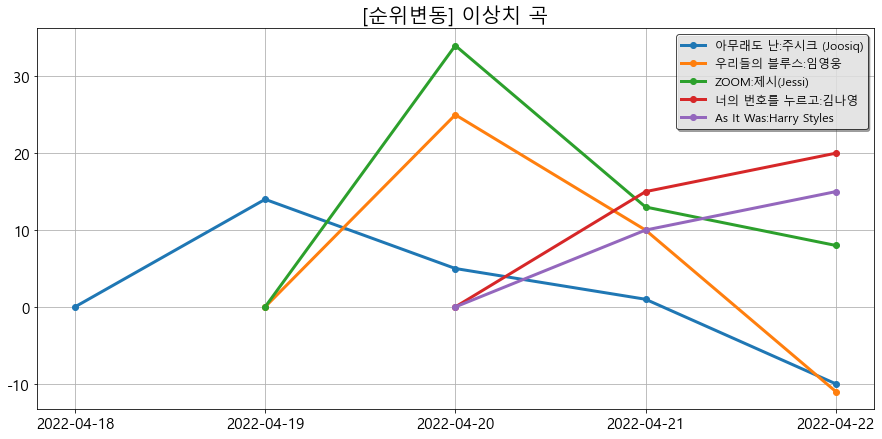

In [125]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [75]:
try:
    os.chdir(code_path)
except:
    pass

'c:/data/Wantreez/Crawling/music'

In [47]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [48]:
start_date, end_date

('2022-04-18', '2022-04-23')

In [49]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_16704/689724725.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_16704/689724725.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [50]:
driver.quit()

### 파일 이동

In [145]:
import glob
import shutil

In [126]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [128]:
os.listdir()

['Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'D2Coding.ttf',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'NEXT LEVEL! 전사원 필수 디지털융합 4차산업혁명_학습자료.pdf',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 "[vibe]20220504_105127_LOVE_me_BE'O(비오).csv",
 '[vibe]20220504_105134_취기를_빌려_(취향저격_그녀_X_산들)_산들.csv',
 '[vibe]20220504_105143_서랍_10CM.csv',
 '[vibe]20220504_105151_벚꽃이_피면_우리_그만_헤어져_벤.csv',
 '[vibe]20220504_105159_이제_나만_믿어요_임영웅.csv',
 '[vibe]20220504_105207_아무래도_난_주시크 (Joosiq).csv',
 '[vibe]20220504_105215_우리들의_블루스_임영웅.csv',
 '[vibe]20220504_105222_ZOOM_제시(Jessi).csv',
 '[vibe]20220504_105231_너의_번호를_누르고_김나영.csv',
 '[vibe]20220504_105239_As_It_Was_Harry Styles.csv',
 '당직스케줄_20220426.xlsx',
 '이상치분석']

In [150]:
csv_file_list = glob.glob('*.csv')
csv_file_list

["[vibe]20220504_105127_LOVE_me_BE'O(비오).csv",
 '[vibe]20220504_105134_취기를_빌려_(취향저격_그녀_X_산들)_산들.csv',
 '[vibe]20220504_105143_서랍_10CM.csv',
 '[vibe]20220504_105151_벚꽃이_피면_우리_그만_헤어져_벤.csv',
 '[vibe]20220504_105159_이제_나만_믿어요_임영웅.csv',
 '[vibe]20220504_105207_아무래도_난_주시크 (Joosiq).csv',
 '[vibe]20220504_105215_우리들의_블루스_임영웅.csv',
 '[vibe]20220504_105222_ZOOM_제시(Jessi).csv',
 '[vibe]20220504_105231_너의_번호를_누르고_김나영.csv',
 '[vibe]20220504_105239_As_It_Was_Harry Styles.csv']

In [151]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-04-18_2022-04-24/vibe/'

In [153]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

# 코드 마지막